使用随机梯度下降算法实现多项式回归  
可以参考下https://www.cnblogs.com/HuZihu/p/10829877.html 把代码重构为类
$$
f_{\theta}(x)=\theta_{0}+\theta_{1} x+\theta_{2} x^{2}
$$
$$
\theta_{j}:=\theta_{j}-\eta \sum_{i=1}^{n}\left(f_{\theta}\left(\boldsymbol{x}^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}
$$


In [84]:
import numpy as np
import matplotlib.pyplot as plt


In [85]:
# 读入训练数据
train = np.loadtxt('data/click.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:, 0]
train_y = train[:, 1]


In [86]:
# 标准化
mu = train_x.mean()
sigma = train_x.std()


def standardize(x):
    return (x - mu) / sigma


train_z = standardize(train_x)


In [87]:
# 创建训练数据的矩阵
def to_matrix(x):
    return np.vstack([np.ones(x.size), x, x ** 2]).T


X = to_matrix(train_z)



In [88]:
# 预测函数
def f(x):
    return np.dot(x, theta)

# 均方误差


def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

In [89]:
# 参数初始化
theta = np.random.rand(3)
# 学习率
ETA = 1e-3

# 误差的差值
diff = 1

# 更新次数
count = 0
error = MSE(X, train_y)
errors = []
errors.append(error)
# 重复学习

while diff > 1e-2:
    # 使用随机梯度下降法更新参数，每次只抽取一个索引k进行更新
    p = np.random.permutation(X.shape[0])
    for x, y in zip(X[p, :], train_y[p]):
        theta = theta - ETA * (f(x) - y) * x

    # 计算与上一次误差的差值
    error = MSE(X, train_y)
    errors.append(error)
    diff = abs(errors[-2]-errors[-1])
    # 输出日志
    count += 1
    log = '第 {} 次 : theta = {}, 差值 = {:.4f}'
    print(log.format(count, theta, diff))



第 1 次 : theta = [8.74988285 2.75308464 9.21669294], 差值 = 14976.5923
第 2 次 : theta = [16.82911309  4.56512344 17.40266009], 差值 = 13525.4432
第 3 次 : theta = [24.58812987  6.36431447 25.07893742], 差值 = 12213.4313
第 4 次 : theta = [32.03938726  8.16755734 32.32225947], 差值 = 11071.1101
第 5 次 : theta = [39.20732459  9.9230631  39.06335927], 差值 = 9978.9527
第 6 次 : theta = [46.10539404 11.64377842 45.42789562], 差值 = 9064.3971
第 7 次 : theta = [52.74576496 13.31761107 51.35907951], 差值 = 8191.6246
第 8 次 : theta = [59.14421396 14.96051813 56.93460958], 差值 = 7443.3225
第 9 次 : theta = [65.29664087 16.62928481 62.13887905], 差值 = 6750.8982
第 10 次 : theta = [71.23218549 18.24354395 66.9890368 ], 差值 = 6125.8826
第 11 次 : theta = [76.95051563 19.84258791 71.4991361 ], 差值 = 5562.2739
第 12 次 : theta = [82.47079326 21.40623815 75.70834766], 差值 = 5066.8421
第 13 次 : theta = [87.79549526 22.96823168 79.63080189], 差值 = 4621.3671
第 14 次 : theta = [92.94563312 24.49866291 83.31704263], 差值 = 4234.4939
第 15 次 : theta

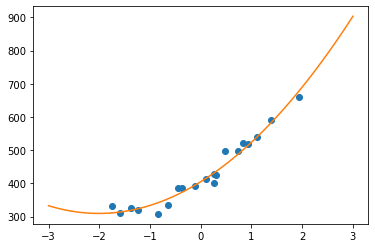

In [90]:
# 绘图确认
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()


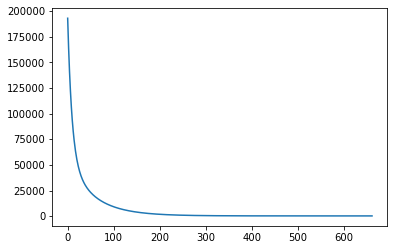

In [91]:
# MSE 不断在下降
plt.clf()
x = np.arange(len(errors))
plt.plot(x, errors)
plt.show()


❓本来期待MSE的图会是上上下下的，然而并没有